In [1]:
import os
import sys
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sn
import scipy
import csv

from pprint import pprint
from sklearn.cluster import KMeans
from sklearn.metrics.cluster import contingency_matrix
from sklearn.metrics import confusion_matrix

In [2]:
val_data_file = "./data/val.csv"
train_data_file = "./data/train.csv"

In [3]:
train_df = pd.read_csv(train_data_file)
val_df = pd.read_csv(val_data_file)

### Validation Set

In [4]:
val_df

,Unnamed: 0,seconds_since_previous_pull,HH_ID,roll_ID,roll_type,multiple_pull_flag,starting_time,number_pulled,total_sheets_used,average_sheets_between_pulls,max_sheets_pull,max_min_pull_diff,elapsed_time,average_time_between_pulls,max_time_duration,label
0,0,4282,A,1200,Small,False,2019-10-29 05:51:42,1,3.991088,0.000000,3.991088,0.000000,0,0.000000,0,pee & hand washing
1,0,2394,A,1200,Small,False,2019-10-29 07:13:21,1,4.277735,0.000000,4.277735,0.000000,0,0.000000,0,pee & hand washing
2,0,14200,A,1200,Small,False,2019-10-29 11:10:01,1,2.363388,0.000000,2.363388,0.000000,0,0.000000,0,pee & hand washing
3,0,828,A,1200,Small,True,2019-10-29 11:23:49,2,2.980160,2.665750,2.665750,2.351341,4,4.000000,4,pee & hand washing
4,0,12312,A,1200,Small,False,2019-10-29 14:49:05,1,2.186278,0.000000,2.186278,0.000000,0,0.000000,0,pee & hand washing
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
710,0,8053,A,12553,Big,False,2020-06-20 06:50:31,1,6.877803,0.000000,6.877803,0.000000,0,0.000000,0,pee & hand washing
711,0,1182,A,12553,Big,True,2020-06-20 07:10:13,2,13.338421,4.183706,9.154715,4.971008,106,106.000000,106,poo
712,0,29711,A,12553,Big,True,2020-06-20 15:27:10,14,32.941774,2.524851,9.471123,9.471123,320,24.615385,259,object cleaning
713,0,33992,A,12553,Big,False,2020-06-21 00:59:02,1,9.194302,0.000000,9.194302,0.000000,0,0.000000,0,pee & hand washing


In [5]:
def visualize_2d_features_w_labels(name1, name2):
    x_vec = val_df[name1].to_numpy().flatten()
    y_vec = val_df[name2].to_numpy().flatten()
    label_vec = val_df["label"].to_numpy().flatten()
    no1_idx = (label_vec == "pee & hand washing")
    no2_idx = (label_vec == "poo")
    cleaning_idx = (label_vec == "object cleaning")
    plt.figure(figsize = (10, 10))
    plt.scatter(x_vec[no1_idx], y_vec[no1_idx], color = "green", label = "No.1 event")
    plt.scatter(x_vec[no2_idx], y_vec[no2_idx], color = "black", label = "No.2 event")
    plt.scatter(x_vec[cleaning_idx], y_vec[cleaning_idx], color = "blue", label = "Cleaning")
    plt.legend()
    plt.show()

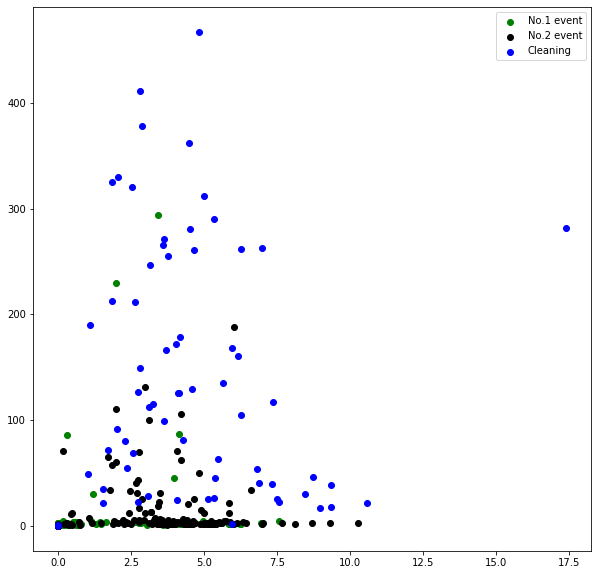

In [6]:
visualize_2d_features_w_labels("average_sheets_between_pulls", "elapsed_time")

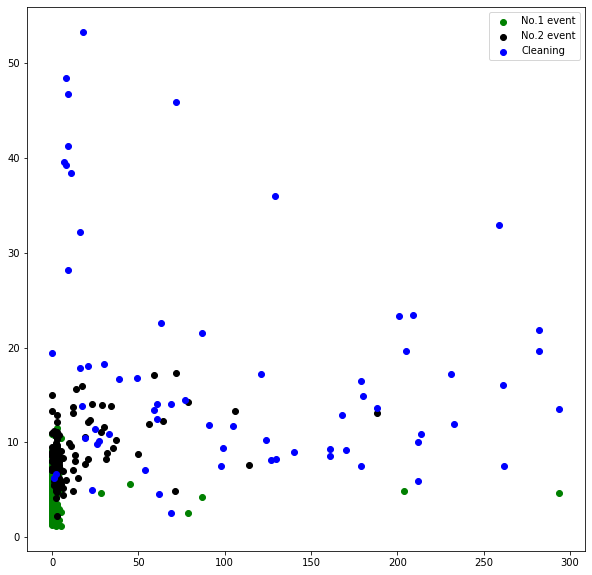

In [7]:
visualize_2d_features_w_labels("max_time_duration", "total_sheets_used")